## Exercise 4.6 Adding layers to a network

In this exercise, you will use the same titanic dataset from the previous exercises. You can download the dataset from the following link:

[titanic_all_numeric.csv](https://drive.google.com/file/d/11nuYS-l3EXCsGJt81y4YTt3oTnFGaB68/view?usp=drive_link)

The data is pre-loaded into a pandas DataFrame called `df`. The `predictors` and `target` values are also pre-defined.

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

You will create two models, the first model, `model_1`, has a hidden layer with `10` units and an output layer. The second model, `model_2`, has three hidden layers (still keeping `10` units in each layer), and an outpul layer.

So we say, `mode_2` is deeper than `model_1`.

After you create `model_1` and `model_2`, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument `verbose=False` in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

## Instructions

* Create `model_1` and `model_2`: model_1 has a Dense layer with 10 units. model_2 has three Dense layers with 10 units for each layer. The activation function for the hidden layers are `'relu'`. Use `2` nodes for the Dense output layer with `'softmax'` as the activation.
* Compile `model_1` and `model_2` as you have done in the previous exercise: Using `'adam'` as the optimizer, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
* Fit both the models and visualize to see which one gives better results! Notice the keyword argument `verbose=False` in `model.fit()`: This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.

## Code

Load data and convert the data to NumPy array:

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Load csv file into the dataframe: df
df = pd.read_csv("titanic_all_numeric.csv")

# Convert the boolean values of the 'age_was_missing' column to integer
df.age_was_missing = df.age_was_missing.replace({True: 1, False: 0})

# Create predictors NumPy array: predictors
predictors = df.drop(['survived'], axis=1).values

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Convert the target to categorical: target
target = to_categorical(df['survived'])

# Define the input shape: input_shape
input_shape = (n_cols,)


/tmp/ipython-input-3273134080.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.age_was_missing = df.age_was_missing.replace({True: 1, False: 0})


Create a neural network for a classification task

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define a function to create model_1:
def get_new_model1(input_shape):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=input_shape))
    model.add(Dense(2, activation='softmax'))
    return model

# Define a function to create model_2:
def get_new_model2(input_shape):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=input_shape))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model


Compile and fit the model with a validation dataset:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


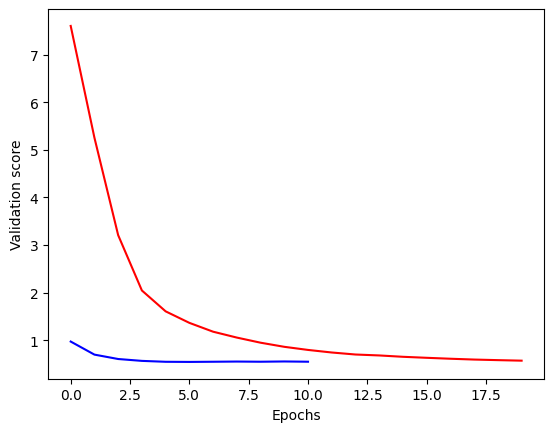

In [3]:
import matplotlib.pyplot as plt

# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Specify the model_1
model_1 = get_new_model1(input_shape)

# Specify the model_2
model_2 = get_new_model2(input_shape)

# Compile the model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Compile the model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor with patience = 5
early_stopping_monitor = EarlyStopping(patience=5)

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


The ouput should be:

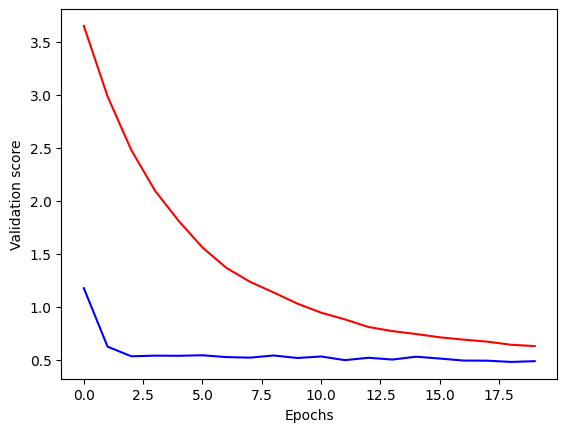
